# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# performing weather check on every single city and printing the log
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid="+weather_api_key
    response = requests.get(url)
    data = response.json()
    try: 
        print(f'City ID: {data["id"]}, Name: {data["name"]}')
        print('============================================')
    except:
        pass
    else:
        print(f'Cloudiness(%): {data["clouds"]["all"]}, Country: {data["sys"]["country"]}, Date: {data["dt"]}, Humidity(%): {data["main"]["humidity"]}, Latitude: {data["coord"]["lat"]}, Longitude: {data["coord"]["lon"]}, Temparature(F): {data["main"]["temp_max"]}, Wind Speed(mph): {data["wind"]["speed"]}')
        print('--------------------------------------------')

City ID: 4031574, Name: Provideniya
Cloudiness(%): 99, Country: RU, Date: 1592095744, Humidity(%): 81, Latitude: 64.38, Longitude: -173.3, Temparature(F): 281.52, Wind Speed(mph): 2.91
--------------------------------------------
City ID: 3421765, Name: Nanortalik
Cloudiness(%): 100, Country: GL, Date: 1592095745, Humidity(%): 92, Latitude: 60.14, Longitude: -45.24, Temparature(F): 278.33, Wind Speed(mph): 4.38
--------------------------------------------
City ID: 964432, Name: Port Alfred
Cloudiness(%): 81, Country: ZA, Date: 1592095745, Humidity(%): 87, Latitude: -33.59, Longitude: 26.89, Temparature(F): 284.26, Wind Speed(mph): 2.24
--------------------------------------------
City ID: 3466704, Name: Castro
Cloudiness(%): 100, Country: BR, Date: 1592095715, Humidity(%): 96, Latitude: -24.79, Longitude: -50.01, Temparature(F): 288.39, Wind Speed(mph): 1.73
--------------------------------------------
City ID: 5962442, Name: Goderich
Cloudiness(%): 100, Country: CA, Date: 1592095745, 

City ID: 408689, Name: Lárdos
Cloudiness(%): 20, Country: GR, Date: 1592095749, Humidity(%): 88, Latitude: 36.09, Longitude: 28.02, Temparature(F): 294.82, Wind Speed(mph): 3.6
--------------------------------------------
City ID: 5848280, Name: Kapaa
Cloudiness(%): 40, Country: US, Date: 1592095749, Humidity(%): 58, Latitude: 22.08, Longitude: -159.32, Temparature(F): 302.15, Wind Speed(mph): 6.7
--------------------------------------------
City ID: 3407882, Name: Altamira
Cloudiness(%): 84, Country: BR, Date: 1592095749, Humidity(%): 71, Latitude: -3.2, Longitude: -52.21, Temparature(F): 298.97, Wind Speed(mph): 1.73
--------------------------------------------
City ID: 1688781, Name: City of San Pedro
Cloudiness(%): 75, Country: PH, Date: 1592095749, Humidity(%): 70, Latitude: 14.35, Longitude: 121.02, Temparature(F): 304.26, Wind Speed(mph): 3.1
--------------------------------------------
City ID: 5855927, Name: Hilo
Cloudiness(%): 90, Country: US, Date: 1592095750, Humidity(%): 5

City ID: 4589446, Name: North Myrtle Beach
Cloudiness(%): 90, Country: US, Date: 1592095754, Humidity(%): 83, Latitude: 33.82, Longitude: -78.68, Temparature(F): 294.15, Wind Speed(mph): 6.7
--------------------------------------------
City ID: 3369157, Name: Cape Town
Cloudiness(%): 40, Country: ZA, Date: 1592095571, Humidity(%): 81, Latitude: -33.93, Longitude: 18.42, Temparature(F): 283.15, Wind Speed(mph): 3.6
--------------------------------------------
City ID: 6089245, Name: Norman Wells
Cloudiness(%): 75, Country: CA, Date: 1592095754, Humidity(%): 25, Latitude: 65.28, Longitude: -126.83, Temparature(F): 296.15, Wind Speed(mph): 8.7
--------------------------------------------
City ID: 2123814, Name: Leningradskiy
Cloudiness(%): 73, Country: RU, Date: 1592095754, Humidity(%): 52, Latitude: 69.38, Longitude: 178.42, Temparature(F): 287.91, Wind Speed(mph): 1.11
--------------------------------------------
City ID: 3421719, Name: Narsaq
Cloudiness(%): 100, Country: GL, Date: 1592

City ID: 546105, Name: Nikolskoye
Cloudiness(%): 0, Country: RU, Date: 1592095759, Humidity(%): 71, Latitude: 59.7, Longitude: 30.79, Temparature(F): 284.15, Wind Speed(mph): 1.82
--------------------------------------------
City ID: 5697939, Name: North Platte
Cloudiness(%): 1, Country: US, Date: 1592095594, Humidity(%): 33, Latitude: 41.12, Longitude: -100.77, Temparature(F): 304.15, Wind Speed(mph): 7.7
--------------------------------------------
City ID: 1651591, Name: Amahai
Cloudiness(%): 67, Country: ID, Date: 1592095759, Humidity(%): 75, Latitude: -3.33, Longitude: 128.92, Temparature(F): 301.15, Wind Speed(mph): 0.45
--------------------------------------------
City ID: 2434584, Name: Bousso
Cloudiness(%): 100, Country: TD, Date: 1592095759, Humidity(%): 63, Latitude: 10.48, Longitude: 16.71, Temparature(F): 299.77, Wind Speed(mph): 2.18
--------------------------------------------
City ID: 1835848, Name: Seoul
Cloudiness(%): 75, Country: KR, Date: 1592094933, Humidity(%): 69

City ID: 932035, Name: Teyateyaneng
Cloudiness(%): 0, Country: LS, Date: 1592095763, Humidity(%): 80, Latitude: -29.15, Longitude: 27.75, Temparature(F): 270.35, Wind Speed(mph): 1.02
--------------------------------------------
City ID: 1816751, Name: Beidao
Cloudiness(%): 92, Country: CN, Date: 1592095763, Humidity(%): 54, Latitude: 34.57, Longitude: 105.89, Temparature(F): 293.72, Wind Speed(mph): 0.13
--------------------------------------------
City ID: 2088122, Name: Port Moresby
Cloudiness(%): 75, Country: PG, Date: 1592095763, Humidity(%): 83, Latitude: -9.44, Longitude: 147.18, Temparature(F): 302.15, Wind Speed(mph): 5.1
--------------------------------------------
City ID: 4021858, Name: Guerrero Negro
Cloudiness(%): 0, Country: MX, Date: 1592095763, Humidity(%): 65, Latitude: 27.98, Longitude: -114.06, Temparature(F): 293.58, Wind Speed(mph): 10.35
--------------------------------------------
City ID: 3838233, Name: Salta
Cloudiness(%): 90, Country: AR, Date: 1592095764, Hu

City ID: 2164837, Name: Goulburn
Cloudiness(%): 83, Country: AU, Date: 1592095768, Humidity(%): 74, Latitude: -34.75, Longitude: 149.72, Temparature(F): 284.82, Wind Speed(mph): 9.18
--------------------------------------------
City ID: 2520645, Name: Cabra
Cloudiness(%): 100, Country: ES, Date: 1592095768, Humidity(%): 61, Latitude: 37.47, Longitude: -4.44, Temparature(F): 290.37, Wind Speed(mph): 1.05
--------------------------------------------
City ID: 1052373, Name: Beira
Cloudiness(%): 75, Country: MZ, Date: 1592095769, Humidity(%): 77, Latitude: -19.84, Longitude: 34.84, Temparature(F): 294.15, Wind Speed(mph): 5.1
--------------------------------------------
City ID: 3393106, Name: Paragominas
Cloudiness(%): 100, Country: BR, Date: 1592095530, Humidity(%): 92, Latitude: -2.97, Longitude: -47.48, Temparature(F): 295.94, Wind Speed(mph): 0.64
--------------------------------------------
City ID: 5870133, Name: Nome
Cloudiness(%): 20, Country: US, Date: 1592095769, Humidity(%): 48

City ID: 6316343, Name: Alta Floresta
Cloudiness(%): 0, Country: BR, Date: 1592095773, Humidity(%): 75, Latitude: -9.88, Longitude: -56.09, Temparature(F): 296.26, Wind Speed(mph): 1.05
--------------------------------------------
City ID: 2015306, Name: Tiksi
Cloudiness(%): 100, Country: RU, Date: 1592095773, Humidity(%): 95, Latitude: 71.69, Longitude: 128.87, Temparature(F): 273.61, Wind Speed(mph): 3.24
--------------------------------------------
City ID: 4026082, Name: Lázaro Cárdenas
Cloudiness(%): 97, Country: MX, Date: 1592095664, Humidity(%): 78, Latitude: 17.96, Longitude: -102.2, Temparature(F): 300.86, Wind Speed(mph): 3.89
--------------------------------------------
City ID: 3159954, Name: Brønnøysund
Cloudiness(%): 97, Country: NO, Date: 1592095773, Humidity(%): 93, Latitude: 65.46, Longitude: 12.2, Temparature(F): 284.15, Wind Speed(mph): 0.5
--------------------------------------------
City ID: 2015913, Name: Suntar
Cloudiness(%): 6, Country: RU, Date: 1592095773, Hum

City ID: 2688250, Name: Norrtälje
Cloudiness(%): 0, Country: SE, Date: 1592095778, Humidity(%): 63, Latitude: 59.76, Longitude: 18.7, Temparature(F): 289.82, Wind Speed(mph): 0.89
--------------------------------------------
City ID: 2112802, Name: Hasaki
Cloudiness(%): 75, Country: JP, Date: 1592095778, Humidity(%): 94, Latitude: 35.73, Longitude: 140.83, Temparature(F): 295.93, Wind Speed(mph): 2.1
--------------------------------------------
City ID: 3571592, Name: Rock Sound
Cloudiness(%): 75, Country: BS, Date: 1592095778, Humidity(%): 80, Latitude: 24.9, Longitude: -76.2, Temparature(F): 299.32, Wind Speed(mph): 8.94
--------------------------------------------
City ID: 3645532, Name: Ciudad Bolivar
Cloudiness(%): 96, Country: VE, Date: 1592095778, Humidity(%): 66, Latitude: 8.12, Longitude: -63.55, Temparature(F): 301.23, Wind Speed(mph): 5.26
--------------------------------------------
City ID: 3547867, Name: Manzanillo
Cloudiness(%): 100, Country: CU, Date: 1592095778, Humidi

City ID: 2137748, Name: Voh
Cloudiness(%): 12, Country: NC, Date: 1592095782, Humidity(%): 59, Latitude: -20.97, Longitude: 164.7, Temparature(F): 299.32, Wind Speed(mph): 3.76
--------------------------------------------
City ID: 1622318, Name: Waingapu
Cloudiness(%): 63, Country: ID, Date: 1592095783, Humidity(%): 74, Latitude: -9.66, Longitude: 120.26, Temparature(F): 301.01, Wind Speed(mph): 6.45
--------------------------------------------
City ID: 586925, Name: Buzovna
Cloudiness(%): 0, Country: AZ, Date: 1592095783, Humidity(%): 88, Latitude: 40.52, Longitude: 50.11, Temparature(F): 293.15, Wind Speed(mph): 4.1
--------------------------------------------
City ID: 358620, Name: Safaga
Cloudiness(%): 0, Country: EG, Date: 1592095783, Humidity(%): 20, Latitude: 26.73, Longitude: 33.94, Temparature(F): 304.15, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 292968, Name: Abu Dhabi
Cloudiness(%): 0, Country: AE, Date: 1592095505, Humidity(%): 89, Latitude:

City ID: 5859699, Name: College
Cloudiness(%): 75, Country: US, Date: 1592095787, Humidity(%): 31, Latitude: 64.86, Longitude: -147.8, Temparature(F): 299.15, Wind Speed(mph): 2.81
--------------------------------------------
City ID: 4513583, Name: Hamilton
Cloudiness(%): 8, Country: US, Date: 1592095556, Humidity(%): 65, Latitude: 39.18, Longitude: -84.53, Temparature(F): 294.82, Wind Speed(mph): 1.34
--------------------------------------------
City ID: 149658, Name: Tabora
Cloudiness(%): 19, Country: TZ, Date: 1592095787, Humidity(%): 59, Latitude: -5.02, Longitude: 32.8, Temparature(F): 290.71, Wind Speed(mph): 2.64
--------------------------------------------
City ID: 6149996, Name: Smithers
Cloudiness(%): 40, Country: CA, Date: 1592095501, Humidity(%): 51, Latitude: 54.78, Longitude: -127.17, Temparature(F): 288.15, Wind Speed(mph): 4.1
--------------------------------------------
City ID: 8079926, Name: Labuhan
Cloudiness(%): 100, Country: ID, Date: 1592095788, Humidity(%): 89,

City ID: 372884, Name: Kapoeta
Cloudiness(%): 57, Country: SS, Date: 1592095792, Humidity(%): 81, Latitude: 4.77, Longitude: 33.59, Temparature(F): 295.97, Wind Speed(mph): 1.25
--------------------------------------------
City ID: 2444219, Name: Gouré
Cloudiness(%): 0, Country: NE, Date: 1592095792, Humidity(%): 34, Latitude: 13.98, Longitude: 10.27, Temparature(F): 303.13, Wind Speed(mph): 3.8
--------------------------------------------
City ID: 3840300, Name: Presidencia Roque Sáenz Peña
Cloudiness(%): 45, Country: AR, Date: 1592095792, Humidity(%): 49, Latitude: -26.79, Longitude: -60.44, Temparature(F): 283.71, Wind Speed(mph): 0.45
--------------------------------------------
City ID: 3860443, Name: Comodoro Rivadavia
Cloudiness(%): 100, Country: AR, Date: 1592095792, Humidity(%): 59, Latitude: -45.87, Longitude: -67.5, Temparature(F): 278.15, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 5554428, Name: Ketchikan
Cloudiness(%): 90, Country: US, Date:

City ID: 3139597, Name: Sistranda
Cloudiness(%): 1, Country: NO, Date: 1592095797, Humidity(%): 93, Latitude: 63.73, Longitude: 8.83, Temparature(F): 285.15, Wind Speed(mph): 2.1
--------------------------------------------
City ID: 6945992, Name: Betsiamites
Cloudiness(%): 1, Country: CA, Date: 1592095797, Humidity(%): 58, Latitude: 48.94, Longitude: -68.65, Temparature(F): 285.15, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 2980915, Name: Arrondissement de Saint-Denis
Cloudiness(%): 75, Country: FR, Date: 1592095797, Humidity(%): 72, Latitude: 48.92, Longitude: 2.33, Temparature(F): 290.15, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 1791636, Name: Weinan
Cloudiness(%): 1, Country: CN, Date: 1592095798, Humidity(%): 78, Latitude: 34.5, Longitude: 109.51, Temparature(F): 299.82, Wind Speed(mph): 1
--------------------------------------------
City ID: 3372472, Name: Vila Franca do Campo
Cloudiness(%): 20, Country: PT, Date: 

City ID: 1814093, Name: Dali
Cloudiness(%): 100, Country: CN, Date: 1592095802, Humidity(%): 82, Latitude: 25.7, Longitude: 100.18, Temparature(F): 292.73, Wind Speed(mph): 1.41
--------------------------------------------
City ID: 1608462, Name: Nam Som
Cloudiness(%): 75, Country: TH, Date: 1592095802, Humidity(%): 100, Latitude: 17.77, Longitude: 102.19, Temparature(F): 298.15, Wind Speed(mph): 1
--------------------------------------------
City ID: 6096551, Name: Pangnirtung
Cloudiness(%): 57, Country: CA, Date: 1592095802, Humidity(%): 81, Latitude: 66.15, Longitude: -65.71, Temparature(F): 275.44, Wind Speed(mph): 1.18
--------------------------------------------
City ID: 3167595, Name: Santa Margherita Ligure
Cloudiness(%): 75, Country: IT, Date: 1592095803, Humidity(%): 88, Latitude: 44.33, Longitude: 9.21, Temparature(F): 291.15, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 2014624, Name: Udachny
Cloudiness(%): 90, Country: RU, Date: 1592095803, Hu

City ID: 637292, Name: Savonlinna
Cloudiness(%): 0, Country: FI, Date: 1592095807, Humidity(%): 93, Latitude: 61.87, Longitude: 28.88, Temparature(F): 282.15, Wind Speed(mph): 0.5
--------------------------------------------
City ID: 3351663, Name: Benguela
Cloudiness(%): 4, Country: AO, Date: 1592095807, Humidity(%): 85, Latitude: -12.58, Longitude: 13.41, Temparature(F): 292.66, Wind Speed(mph): 0.61
--------------------------------------------
City ID: 1268408, Name: Kālikāpur
Cloudiness(%): 100, Country: IN, Date: 1592095807, Humidity(%): 79, Latitude: 22.62, Longitude: 86.28, Temparature(F): 302.01, Wind Speed(mph): 1.27
--------------------------------------------
City ID: 4944903, Name: Nantucket
Cloudiness(%): 20, Country: US, Date: 1592095608, Humidity(%): 77, Latitude: 41.28, Longitude: -70.1, Temparature(F): 289.82, Wind Speed(mph): 5.1
--------------------------------------------
City ID: 962367, Name: Richards Bay
Cloudiness(%): 0, Country: ZA, Date: 1592095807, Humidity(%

City ID: 3664525, Name: Codajás
Cloudiness(%): 100, Country: BR, Date: 1592095643, Humidity(%): 95, Latitude: -3.84, Longitude: -62.06, Temparature(F): 297.25, Wind Speed(mph): 0.78
--------------------------------------------
City ID: 1491230, Name: Sovetskiy
Cloudiness(%): 84, Country: RU, Date: 1592095812, Humidity(%): 64, Latitude: 61.36, Longitude: 63.58, Temparature(F): 279.76, Wind Speed(mph): 4.28
--------------------------------------------
City ID: 3688451, Name: Buenaventura
Cloudiness(%): 100, Country: CO, Date: 1592095812, Humidity(%): 92, Latitude: 3.88, Longitude: -77.03, Temparature(F): 297.97, Wind Speed(mph): 1.05
--------------------------------------------
City ID: 2121025, Name: Srednekolymsk
Cloudiness(%): 0, Country: RU, Date: 1592095812, Humidity(%): 33, Latitude: 67.45, Longitude: 153.68, Temparature(F): 296.48, Wind Speed(mph): 2.58
--------------------------------------------
City ID: 3988421, Name: Rosamorada
Cloudiness(%): 100, Country: MX, Date: 1592095812

City ID: 2092164, Name: Lorengau
Cloudiness(%): 0, Country: PG, Date: 1592095816, Humidity(%): 68, Latitude: -2.02, Longitude: 147.27, Temparature(F): 303.14, Wind Speed(mph): 4.21
--------------------------------------------
City ID: 2038421, Name: Bayan
Cloudiness(%): 64, Country: CN, Date: 1592095817, Humidity(%): 77, Latitude: 46.08, Longitude: 127.4, Temparature(F): 290.93, Wind Speed(mph): 7.74
--------------------------------------------
City ID: 2171099, Name: Codrington
Cloudiness(%): 100, Country: AU, Date: 1592095817, Humidity(%): 84, Latitude: -38.27, Longitude: 141.97, Temparature(F): 284.38, Wind Speed(mph): 8.16
--------------------------------------------
City ID: 1636426, Name: Manggar
Cloudiness(%): 64, Country: ID, Date: 1592095817, Humidity(%): 78, Latitude: -2.88, Longitude: 108.27, Temparature(F): 302.04, Wind Speed(mph): 7.55
--------------------------------------------
City ID: 2240449, Name: Luanda
Cloudiness(%): 75, Country: AO, Date: 1592095299, Humidity(%): 

City ID: 3357804, Name: Eenhana
Cloudiness(%): 0, Country: NA, Date: 1592095822, Humidity(%): 53, Latitude: -17.47, Longitude: 16.33, Temparature(F): 283.15, Wind Speed(mph): 1.5
--------------------------------------------
City ID: 1141857, Name: Gardez
Cloudiness(%): 0, Country: AF, Date: 1592095822, Humidity(%): 54, Latitude: 33.6, Longitude: 69.23, Temparature(F): 288.33, Wind Speed(mph): 1.29
--------------------------------------------
City ID: 2409914, Name: Bonthe
Cloudiness(%): 100, Country: SL, Date: 1592095822, Humidity(%): 87, Latitude: 7.53, Longitude: -12.51, Temparature(F): 299.18, Wind Speed(mph): 3.08
--------------------------------------------
City ID: 333795, Name: Jijiga
Cloudiness(%): 100, Country: ET, Date: 1592095822, Humidity(%): 88, Latitude: 9.35, Longitude: 42.8, Temparature(F): 290.07, Wind Speed(mph): 5.84
--------------------------------------------
City ID: 3984997, Name: San Quintín
Cloudiness(%): 0, Country: MX, Date: 1592095822, Humidity(%): 63, Latit

City ID: 1488414, Name: Urengoy
Cloudiness(%): 100, Country: RU, Date: 1592095826, Humidity(%): 46, Latitude: 65.97, Longitude: 78.37, Temparature(F): 284.84, Wind Speed(mph): 10.76
--------------------------------------------
City ID: 2079582, Name: Alyangula
Cloudiness(%): 90, Country: AU, Date: 1592095826, Humidity(%): 69, Latitude: -13.85, Longitude: 136.42, Temparature(F): 300.15, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 3175096, Name: Laas
Cloudiness(%): 90, Country: IT, Date: 1592095826, Humidity(%): 87, Latitude: 46.62, Longitude: 10.7, Temparature(F): 283.15, Wind Speed(mph): 1.64
--------------------------------------------
City ID: 2639577, Name: Reading
Cloudiness(%): 0, Country: GB, Date: 1592095791, Humidity(%): 87, Latitude: 51.46, Longitude: -0.97, Temparature(F): 288.15, Wind Speed(mph): 2.1
--------------------------------------------
City ID: 5856516, Name: ‘Āhuimanu
Cloudiness(%): 20, Country: US, Date: 1592095827, Humidity(%): 45, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# performing weather check on every single city and appending in csv
with open(output_data_file,'w', encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(["City_ID", "City_Name", "Cloudiness (%)", "Country", "Date", "Humidity (%)", "Latitude", "Longitude", "Temperature (F)", "Wind Speed (mph)"])

    print("Exporting to CSV. Please wait ...")
    for city in cities:
        url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid="+weather_api_key
        response = requests.get(url)
        data = response.json()
        try: 
            city_id = data["name"]
        except:
            pass
        else:
            writer.writerow([data["id"], data["name"], data["clouds"]["all"], data["sys"]["country"], data["dt"], data["main"]["humidity"], data["coord"]["lat"], data["coord"]["lon"], data["main"]["temp_max"], data["wind"]["speed"]])

Exporting to CSV. Please wait ...


In [34]:
# after exporting create the dataframe
print("Export Complete! Creating Data Frame. Please wait ...")
city_weather_data = pd.read_csv(output_data_file)
city_weather_data.head(10)

Export Complete! Creating Data Frame. Please wait ...


,City_ID,City_Name,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (mph)
0,4031574,Provideniya,99,RU,1592095744,81,64.38,-173.30,281.52,2.91
1,3421765,Nanortalik,100,GL,1592095745,92,60.14,-45.24,278.33,4.38
2,964432,Port Alfred,81,ZA,1592095745,87,-33.59,26.89,284.26,2.24
3,3466704,Castro,100,BR,1592095715,96,-24.79,-50.01,288.39,1.73
4,5962442,Goderich,100,CA,1592095745,72,43.75,-81.72,285.37,5.59
5,2112309,Katsuura,90,JP,1592095745,100,35.13,140.30,295.37,1.50
6,5847411,Kahului,20,US,1592095477,43,20.89,-156.47,304.15,12.30
7,1735106,George Town,20,MY,1592095746,94,5.41,100.34,300.15,1.00
8,3652764,Puerto Ayora,12,EC,1592095746,91,-0.74,-90.35,295.37,3.13
9,3471451,Arraial do Cabo,0,BR,1592095498,83,-22.97,-42.03,296.98,2.08


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
# check for cities with humidity > 100%
city_humidity_more_than_hundred = city_weather_data.loc[(city_weather_data["Humidity (%)"] > 100)]
no_of_cities_humidity_more_than_hundred = city_humidity_more_than_hundred["City_Name"].count()
print(f'Total number of cities where the humidity is more than 100%: {no_of_cities_humidity_more_than_hundred}')

Total number of cities where the humidity is more than 100%: 0


# skipping the following steps as there is no city with humidity > 100%

In [36]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [37]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Observation: The temperature rises as we move away from either end of the Latitude and get closer to the equator


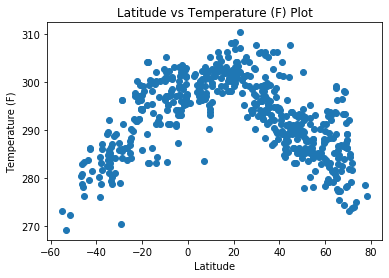

In [52]:
latitude = city_weather_data["Latitude"]
temparature = city_weather_data["Temperature (F)"]
_=plt.scatter(latitude, temparature)
_=plt.title("Latitude vs Temperature (F) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Temperature (F)")
plt.savefig("../output_data/lat_temp.png")
print("Observation: The temperature rises as we move away from either end of the Latitude and get closer to the equator")

## Latitude vs. Humidity Plot

Observation: The humidity rises as we move away from either end of the Latitude and get closer to the equator


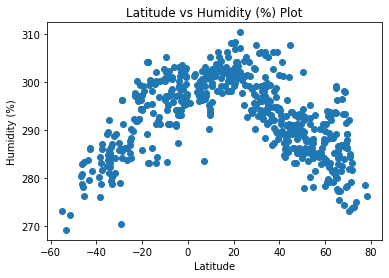

In [53]:
humidity = city_weather_data["Humidity (%)"]
_=plt.scatter(latitude, temparature)

_=plt.title("Latitude vs Humidity (%) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lat_humid.png")
print("Observation: The humidity rises as we move away from either end of the Latitude and get closer to the equator")

## Latitude vs. Cloudiness Plot

Observation: There seem to be no correlation between the Latitude and Cloudiness


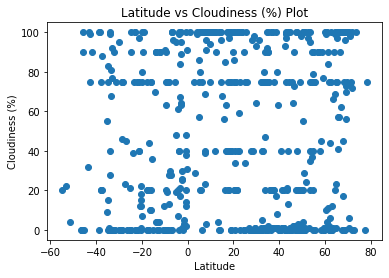

In [54]:
cloudiness = city_weather_data["Cloudiness (%)"]
_=plt.scatter(latitude, cloudiness)

_=plt.title("Latitude vs Cloudiness (%) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/lat_cloud.png")
print("Observation: There seem to be no correlation between the Latitude and Cloudiness")

## Latitude vs. Wind Speed Plot

Observation: The wind speed is mostly evenly distributed across Latitude points. However, there are quite a few outliers between -20 & +40 Latitude


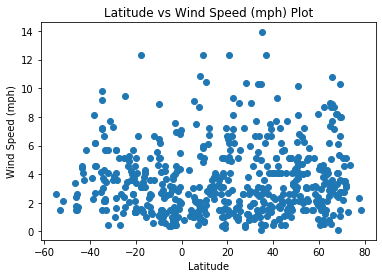

In [55]:
windspeed = city_weather_data["Wind Speed (mph)"]
_=plt.scatter(latitude, windspeed)

_=plt.title("Latitude vs Wind Speed (mph) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/lat_wind.png")
print("Observation: The wind speed is mostly evenly distributed across Latitude points. However, there are quite a few outliers between -20 & +40 Latitude")

## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots

In [51]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_weather_data = city_weather_data.loc[(city_weather_data["Latitude"] >= 0)]
southern_city_weather_data = city_weather_data.loc[(city_weather_data["Latitude"] < 0)]
southern_city_weather_data.head()

,City_ID,City_Name,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (mph)
2,964432,Port Alfred,81,ZA,1592095745,87,-33.59,26.89,284.26,2.24
3,3466704,Castro,100,BR,1592095715,96,-24.79,-50.01,288.39,1.73
8,3652764,Puerto Ayora,12,EC,1592095746,91,-0.74,-90.35,295.37,3.13
9,3471451,Arraial do Cabo,0,BR,1592095498,83,-22.97,-42.03,296.98,2.08
10,3698359,Chicama,30,PE,1592095746,79,-7.84,-79.15,291.30,2.35


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression